# **Building an Regression model using Artificial Neural Networks**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

# Dataset

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
housing = fetch_california_housing()

Number of Instances:
 	
    20640

Number of Attributes:
 	
    8 numeric, predictive attributes and the target

Attribute Information:
      
    * MedInc : median income in block
    * HouseAge : median house age in block
    * AveRooms : average number of rooms
    * AveBedrms : average number of bedrooms
    * Population : block population
    * AveOccup : average house occupancy
    * Latitude : house block latitude
    * Longitude : house block longitude

Target:

    The target variable is the median house value in units of 100,000 for California districts.

Documentation :

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [5]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Splitting the data:

In [6]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test =  train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

Standardizing data:

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
X_train.shape

(11610, 8)

# Creating a Sequential Model

In [18]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",  input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])


In [19]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["mae"])

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_13 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


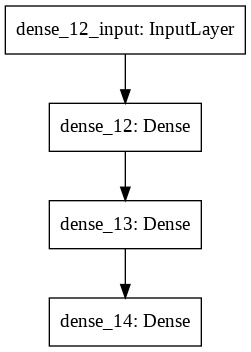

In [22]:
import pydot
keras.utils.plot_model(model)

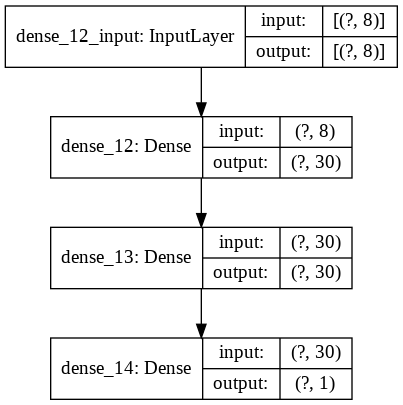

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 0s 1ms/step - loss: 0.4190 - mae: 0.4641 - val_loss: 0.3944 - val_mae: 0.4465
Epoch 2/40
363/363 [==============================] - 0s 1ms/step - loss: 0.4139 - mae: 0.4608 - val_loss: 0.4030 - val_mae: 0.4486
Epoch 3/40
363/363 [==============================] - 0s 1ms/step - loss: 0.4093 - mae: 0.4588 - val_loss: 0.4036 - val_mae: 0.4424
Epoch 4/40
363/363 [==============================] - 0s 1ms/step - loss: 0.4051 - mae: 0.4561 - val_loss: 0.3849 - val_mae: 0.4430
Epoch 5/40
363/363 [==============================] - 0s 1ms/step - loss: 0.4015 - mae: 0.4541 - val_loss: 0.3871 - val_mae: 0.4392
Epoch 6/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3979 - mae: 0.4522 - val_loss: 0.3923 - val_mae: 0.4378
Epoch 7/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3949 - mae: 0.4503 - val_loss: 0.3769 - val_mae: 0.4357
Epoch 8/40
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [33]:
model_history.params

{'epochs': 40, 'steps': 363, 'verbose': 1}

In [34]:
model_history.history

{'loss': [0.4190331995487213,
  0.41393375396728516,
  0.40931349992752075,
  0.4050685465335846,
  0.40151578187942505,
  0.39792007207870483,
  0.39488285779953003,
  0.3920305371284485,
  0.38924384117126465,
  0.38672342896461487,
  0.3846282660961151,
  0.38224440813064575,
  0.38052433729171753,
  0.3781665861606598,
  0.37632349133491516,
  0.3747827708721161,
  0.37281328439712524,
  0.3715949058532715,
  0.3696848452091217,
  0.36825835704803467,
  0.36726412177085876,
  0.365437775850296,
  0.3646635413169861,
  0.3632000684738159,
  0.3621288537979126,
  0.3606078028678894,
  0.3599188029766083,
  0.3586875796318054,
  0.3581356704235077,
  0.3565802276134491,
  0.35560113191604614,
  0.3544934391975403,
  0.354258269071579,
  0.3530455231666565,
  0.35209882259368896,
  0.35119977593421936,
  0.35057732462882996,
  0.3498397171497345,
  0.3487367630004883,
  0.34792986512184143],
 'mae': [0.4641075134277344,
  0.46075910329818726,
  0.45879998803138733,
  0.4560722112655639

Evaluation:

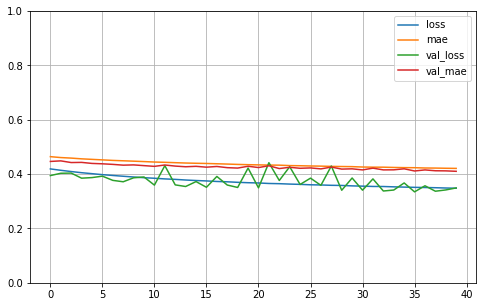

In [35]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 778us/step - loss: 0.3441 - mae: 0.4154


Prediction:

In [40]:
X_new = X_test[:3]

In [41]:
y_pred = model.predict(X_new)

In [44]:
y_pred.round(3)

array([[0.615],
       [1.688],
       [3.893]], dtype=float32)

In [45]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])